<a href="https://colab.research.google.com/github/divyanshi-rasotia/Hepatitis-Mortality-Prediction-/blob/main/Final_Hepatitis_Mortality_Prediction_Modelling_with_Probability_using_Classification_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Hepatitis C

## Installing Dependencies

In [ ]:
!pip install Catboost joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


## Importing Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

# Others
import joblib
import warnings

# Ignoring warnings
warnings.simplefilter("ignore")

## Loading up the data

In [ ]:
df = pd.read_csv("/content/Mortality_Hepatitis.csv")
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


| Term | Full Name | Description |
|------|-----------|-------------|
| ALB  | Albumin | A protein made by the liver, important for maintaining fluid balance and transporting hormones, vitamins, and drugs. |
| ALP  | Alkaline Phosphatase | An enzyme related to the bile ducts; often increased when they are blocked. |
| ALT  | Alanine Aminotransferase | An enzyme that helps process proteins; high levels may indicate liver damage. |
| AST  | Aspartate Aminotransferase | An enzyme found in several parts of the body, including the liver and heart; high levels can indicate liver or heart damage. |
| BIL  | Bilirubin | A substance produced during the normal breakdown of red blood cells; elevated levels may indicate liver dysfunction or other conditions. |
| CHE  | Cholinesterase | An enzyme important for nervous system function; can be affected by liver disease and exposure to certain drugs and toxins. |
| CHOL | Cholesterol | A type of fat essential for the body, used to build cells and make vitamins and other hormones. |
| CREA | Creatinine | A waste product produced by muscles; high levels can indicate kidney dysfunction. |
| GGT  | Gamma-Glutamyl Transferase | An enzyme indicating liver or bile duct health. | 9 - 48 | IU/L |
| PROT | Protein | Overall protein levels in the blood, reflecting nutritional status and liver function. | 6.0 - 8.3 | g/dL |


In [ ]:
# Checking the unique category
df.Category.unique()

array([0, 1])

In [ ]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [ ]:
# Checking for missing values in the dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          3
ALP          1
ALT          6
AST         14
BIL          8
CHE          5
CHOL         1
CREA         2
GGT          2
PROT         0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# Checking for missing values in the dataset
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

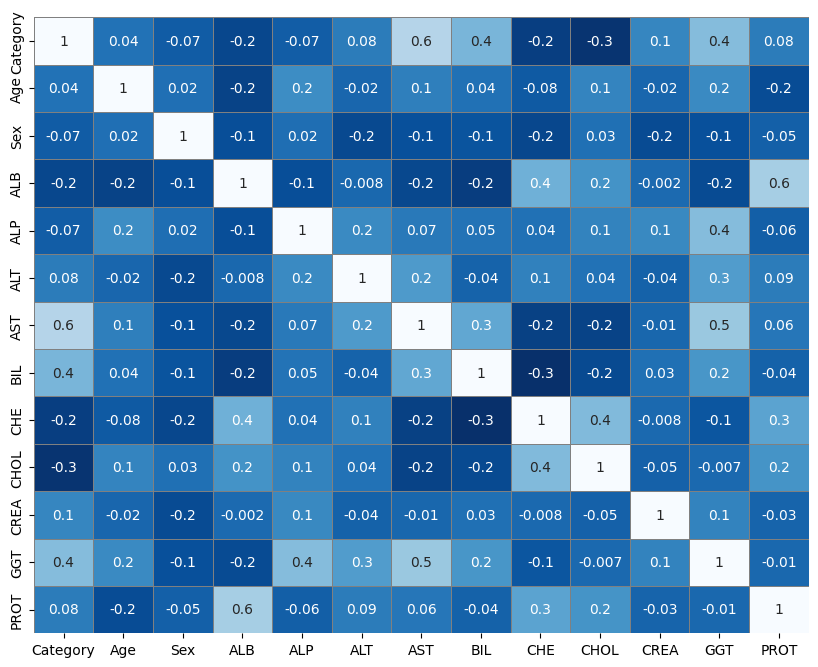

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


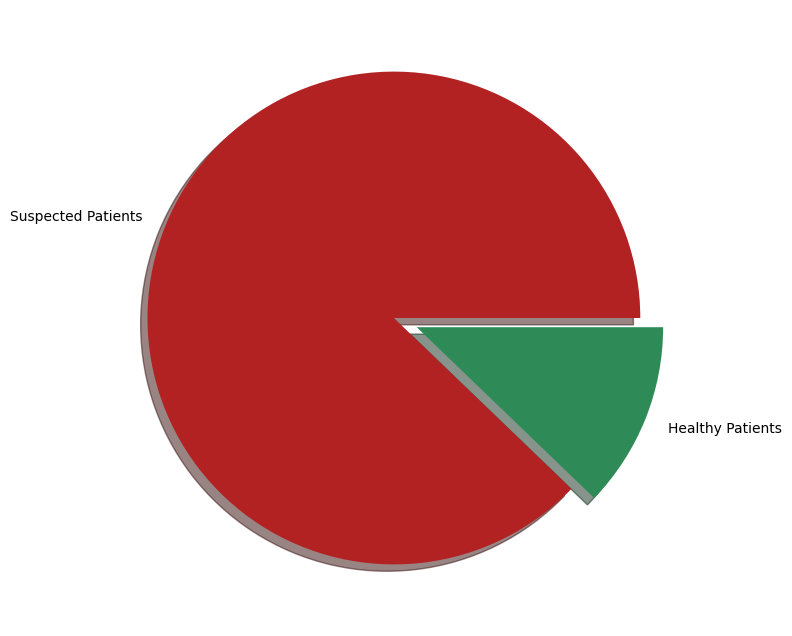

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["firebrick","seagreen"],
        labels=["Suspected Patients","Healthy Patients"],
        shadow = True,
        explode = (0, 0.1)
        )

plt.show()

In [ ]:
df.Sex.value_counts()

1    377
2    238
Name: Sex, dtype: int64

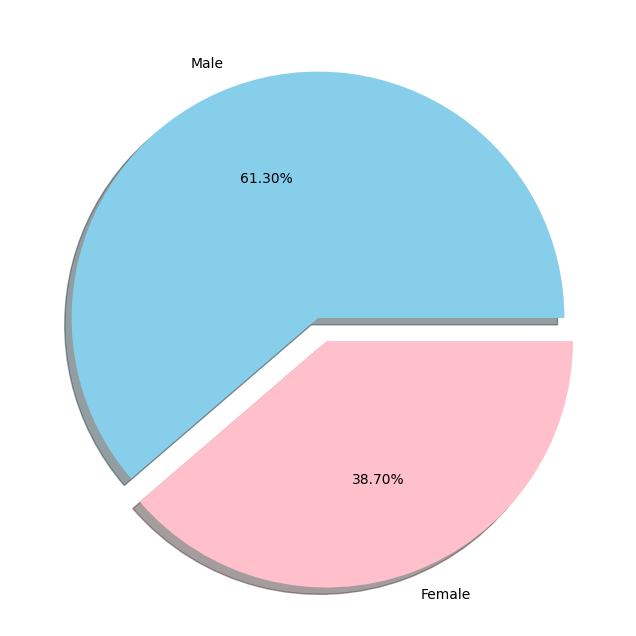

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["skyblue","pink"],
        labels=["Male","Female"],
        shadow = True,
        autopct="%1.2f%%",
        explode = (0, 0.1)
        )
plt.show()

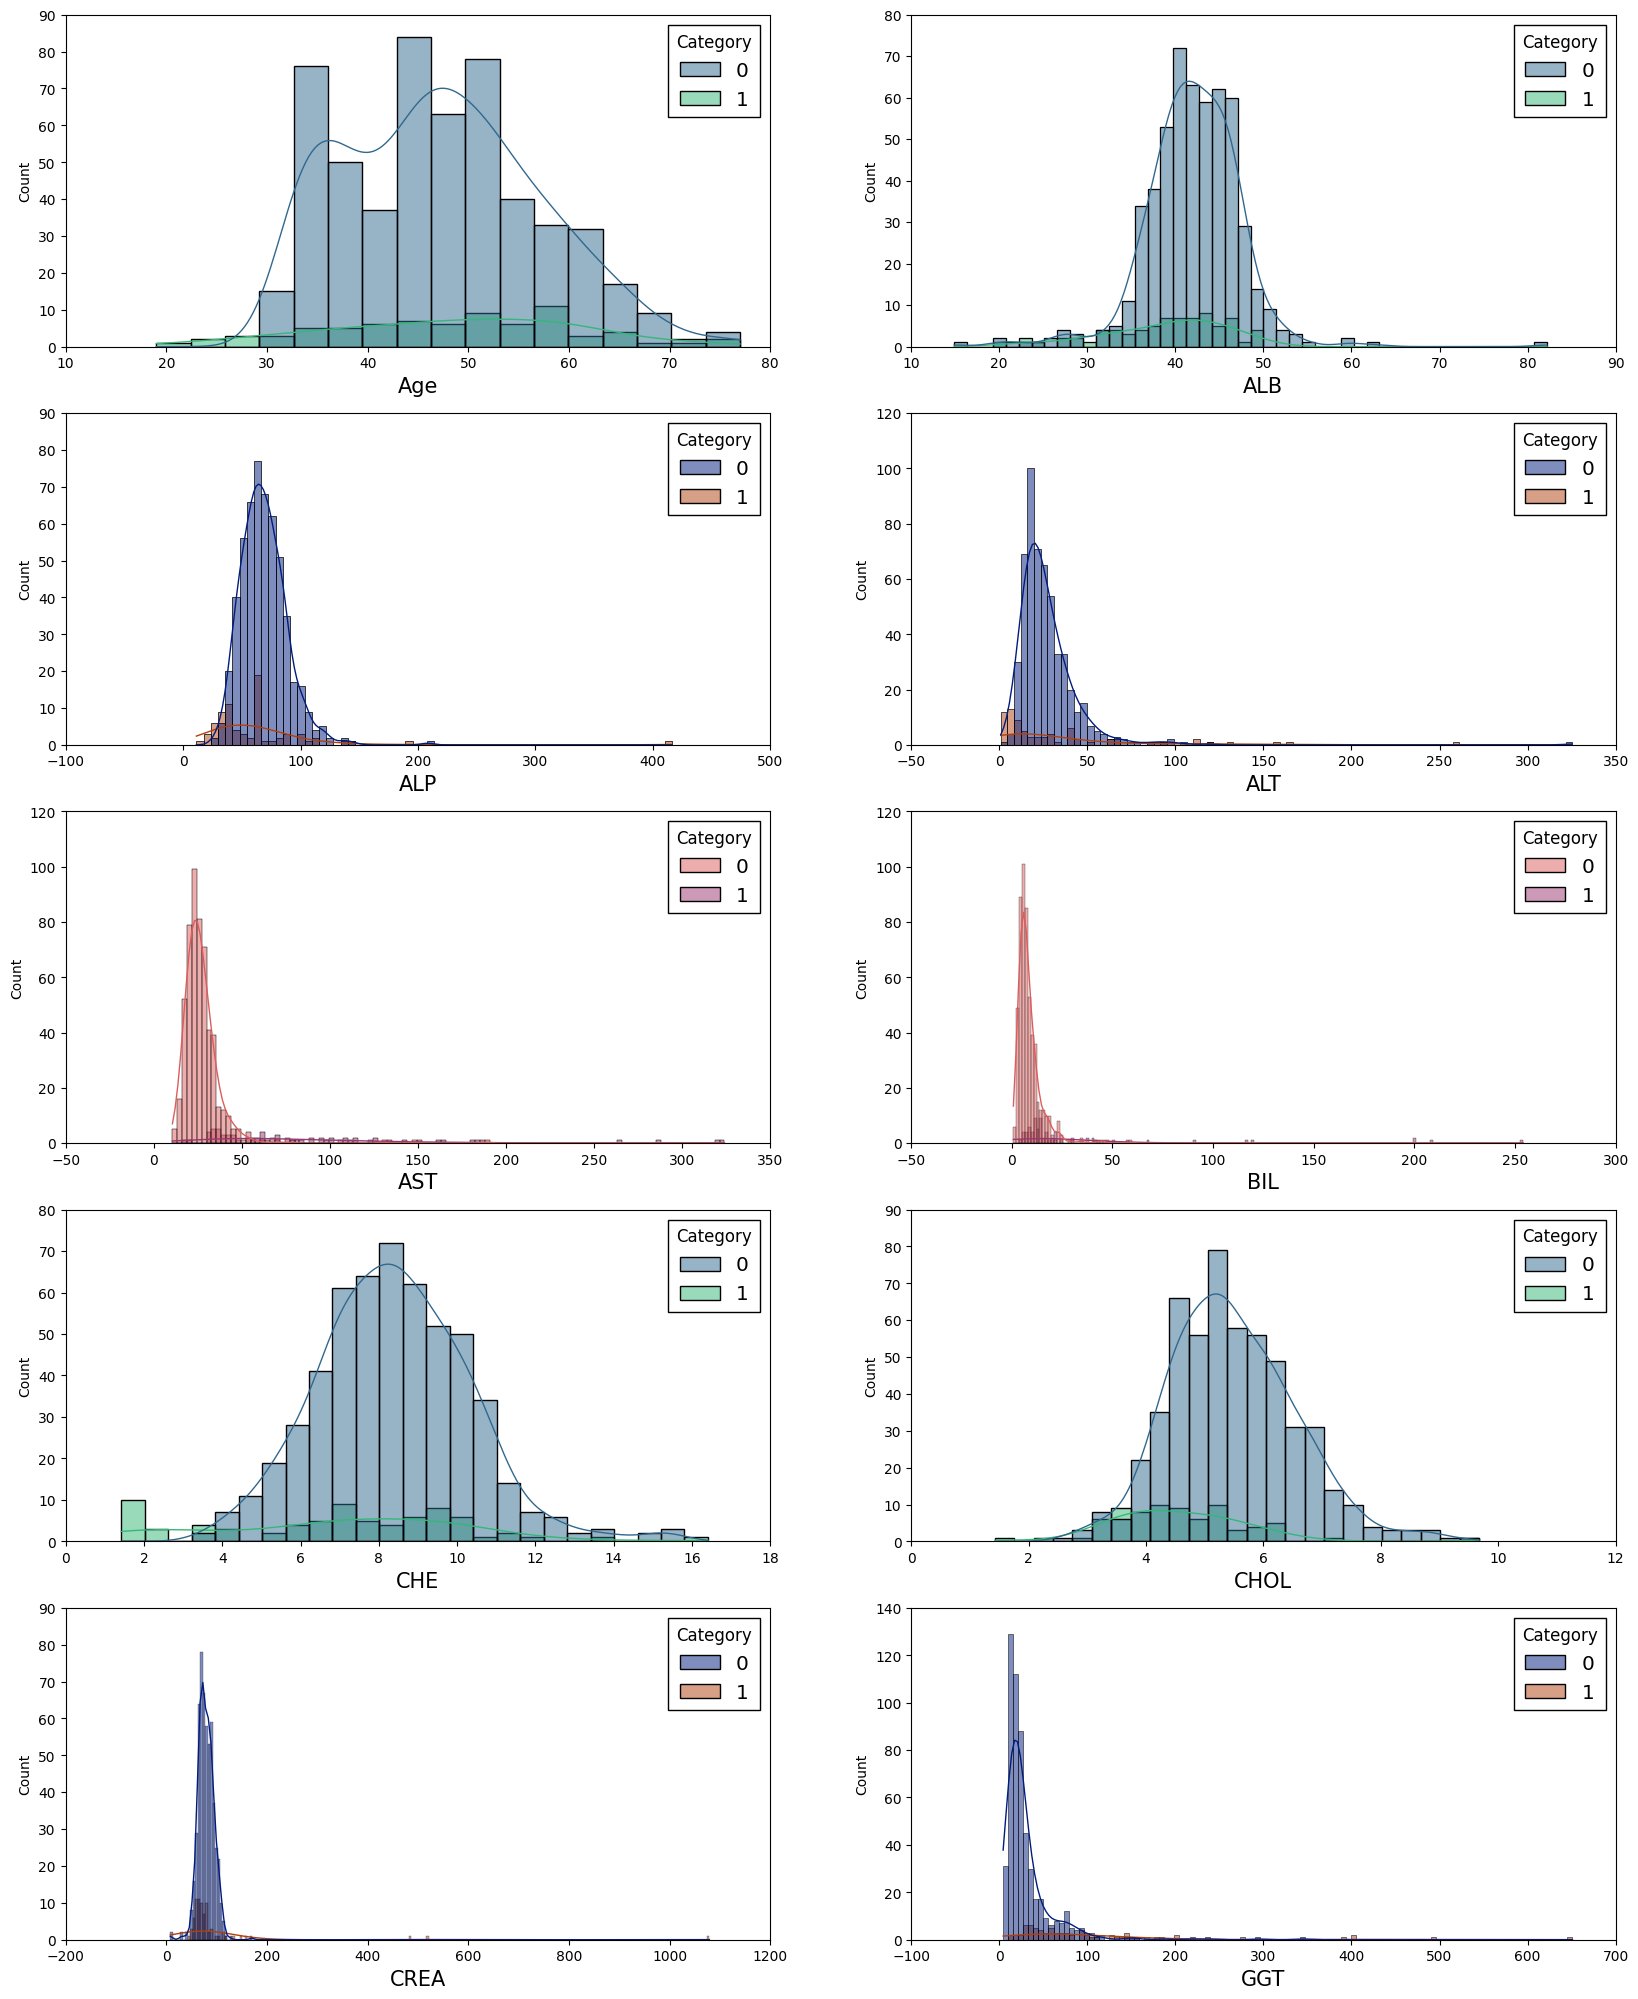

In [ ]:
fig, ax =plt.subplots(5,2, figsize=(20,25))
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

## Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the `Category` will be the y label and rest of the data will be the X or the input data.

In [ ]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(492, 123)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.795366,-0.855800,-2.406591,-0.109289,-0.495846,-0.495791,-0.457138,-1.231813,-0.868465,-0.300373,-0.236832,-1.786981
1,-0.835559,1.168497,-1.822180,1.809219,-0.495846,-0.510394,-0.478465,-1.054822,-0.088977,-0.245595,-0.317308,0.068255
2,0.081836,1.168497,0.356076,-0.838796,-0.465712,-0.238774,-0.174554,-0.002443,-0.020450,-0.318632,-0.548982,0.218173
3,1.508896,1.168497,-1.715924,16.522514,-0.956469,2.214573,2.059463,-1.236597,0.767604,-0.470185,14.997523,-0.643855
4,-0.325895,-0.855800,-1.096095,0.658114,-0.026614,-0.145313,-0.265194,0.313271,1.067407,0.028295,-0.288044,-0.737554
...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.406963,-0.855800,0.745683,0.260201,-0.474322,-0.297187,-0.350502,0.887296,-0.388780,0.119591,-0.302676,-0.212841
119,1.610828,-0.855800,0.639427,0.165460,-0.495846,-0.303028,0.003055,0.365890,-0.611491,-0.008224,-0.392907,0.330612
120,0.795366,-0.855800,-0.033530,-0.393512,-0.547505,-0.533759,-0.243867,-0.863480,-0.157503,-0.026483,-0.573368,-0.381499
121,-1.447156,-0.855800,0.834230,0.018612,-0.767054,-0.422775,-0.302516,-0.380342,-0.945557,-0.044743,-0.419732,-0.625116


## LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 89.43089430894308


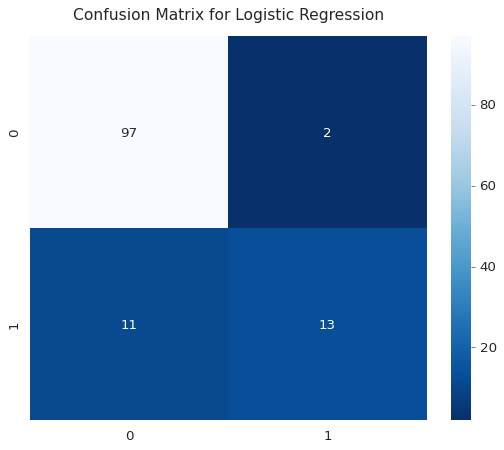

In [ ]:
# Having a look at the confusion matrix for Logistic Regression

sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Having a look at the classification report of Logistic Regression

print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.87      0.54      0.67        24

    accuracy                           0.89       123
   macro avg       0.88      0.76      0.80       123
weighted avg       0.89      0.89      0.88       123



## Confusion Matrix for Hepatitis Mortality Prediction

The confusion matrix evaluates a classification model's performance in predicting hepatitis mortality, with two categories:
- **0 (Non-fatal)**: Patients not at risk of dying from hepatitis.
- **1 (Fatal)**: Patients at risk of dying from hepatitis.

### Key Metrics

- **Non-fatal Cases (0)**
  - **Precision:** 90% - Correctly predicted non-fatal cases among all predicted as non-fatal.
  - **Recall:** 98% - Correctly identified actual non-fatal cases.
  - **F1-Score:** 94% - Balance between precision and recall.

- **Fatal Cases (1)**
  - **Precision:** 87% - Correctly predicted fatal cases among all predicted as fatal.
  - **Recall:** 54% - Correctly identified actual fatal cases.
  - **F1-Score:** 67% - Balance between precision and recall.

- **Overall Accuracy:** 89% - Correct predictions for all cases.

### Insights

- The model is more effective in identifying non-fatal cases, as indicated by high precision and recall in category 0.
- The recall for fatal cases (54%) suggests a need for improvement in detecting actual fatal cases of hepatitis.


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 94.3089430894309


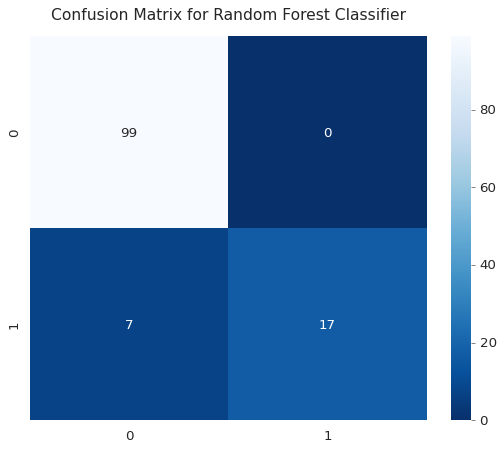

In [ ]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



## K Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 84.5528455284553


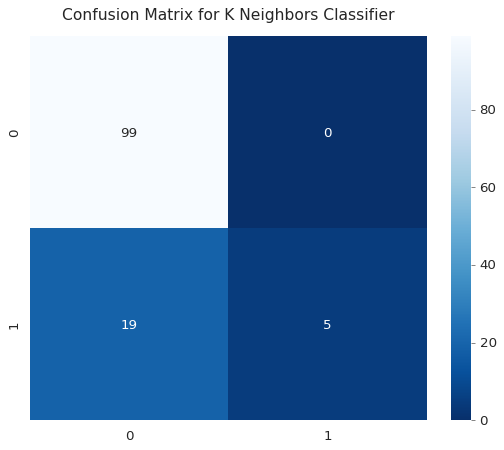

In [ ]:
# Confustion Matrix

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        99
           1       1.00      0.21      0.34        24

    accuracy                           0.85       123
   macro avg       0.92      0.60      0.63       123
weighted avg       0.87      0.85      0.80       123



## Confusion Matrix for Hepatitis Mortality Prediction

The confusion matrix assesses a model's ability to predict hepatitis mortality, categorized as:
- **0 (Non-fatal)**: Patients unlikely to experience fatal outcomes from hepatitis.
- **1 (Fatal)**: Patients at risk of fatal outcomes from hepatitis.

### Key Metrics

- **Non-fatal Cases (0)**
  - **Precision:** 84% - Accuracy in predicting non-fatal cases.
  - **Recall:** 100% - Effectiveness in identifying all actual non-fatal cases.
  - **F1-Score:** 91% - Harmonic mean of precision and recall for non-fatal predictions.

- **Fatal Cases (1)**
  - **Precision:** 100% - Perfect accuracy in predicting fatal cases.
  - **Recall:** 21% - Low effectiveness in identifying actual fatal cases.
  - **F1-Score:** 34% - Reflects the disparity between high precision and low recall.

- **Overall Accuracy:** 85% - Percentage of correct predictions across all cases.

### Insights

- The model excels in identifying non-fatal cases (high recall for category 0), but it struggles to detect fatal cases effectively (low recall for category 1).
- Despite perfect precision in predicting fatal cases, the low recall indicates many actual fatal cases are likely being missed.


## DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 91.05691056910568


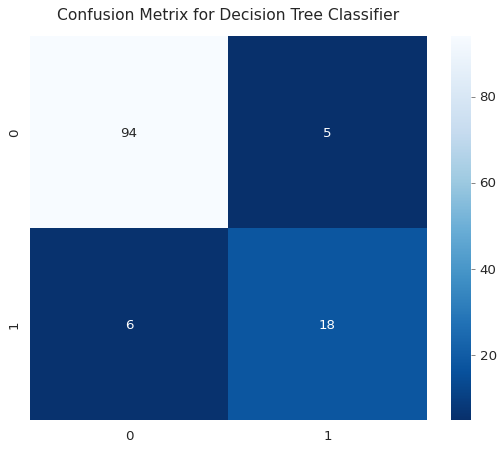

In [ ]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        99
           1       0.78      0.75      0.77        24

    accuracy                           0.91       123
   macro avg       0.86      0.85      0.86       123
weighted avg       0.91      0.91      0.91       123



## Confusion Matrix for Hepatitis Mortality Prediction

The confusion matrix evaluates the model's performance in predicting hepatitis outcomes, divided into:
- **0 (Non-fatal)**: Patients not at risk of a fatal outcome from hepatitis.
- **1 (Fatal)**: Patients at risk of a fatal outcome from hepatitis.

### Key Metrics

- **Non-fatal Cases (0)**
  - **Precision:** 94% - High accuracy in predicting non-fatal cases.
  - **Recall:** 96% - Effectively identifies most actual non-fatal cases.
  - **F1-Score:** 95% - Strong balance between precision and recall.

- **Fatal Cases (1)**
  - **Precision:** 82% - Good accuracy in predicting fatal cases.
  - **Recall:** 75% - Fairly effective in identifying actual fatal cases.
  - **F1-Score:** 78% - A moderate balance between precision and recall.

- **Overall Accuracy:** 92% - General effectiveness of the model across all cases.

### Insights

- The model demonstrates strong performance in identifying non-fatal cases with high precision and recall.
- Performance in predicting fatal cases is good but shows room for improvement, especially in terms of recall.


## CatBoost Classifier

In [ ]:
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.4095295	total: 55.1ms	remaining: 496ms
1:	learn: 0.3042062	total: 68.1ms	remaining: 272ms
2:	learn: 0.2302602	total: 76.8ms	remaining: 179ms
3:	learn: 0.1908148	total: 82.3ms	remaining: 123ms
4:	learn: 0.1596401	total: 94.2ms	remaining: 94.2ms
5:	learn: 0.1293411	total: 102ms	remaining: 68.2ms
6:	learn: 0.1132179	total: 110ms	remaining: 47ms
7:	learn: 0.0989641	total: 127ms	remaining: 31.7ms
8:	learn: 0.0877744	total: 136ms	remaining: 15.1ms
9:	learn: 0.0782054	total: 142ms	remaining: 0us


In [ ]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 90.2439024390244


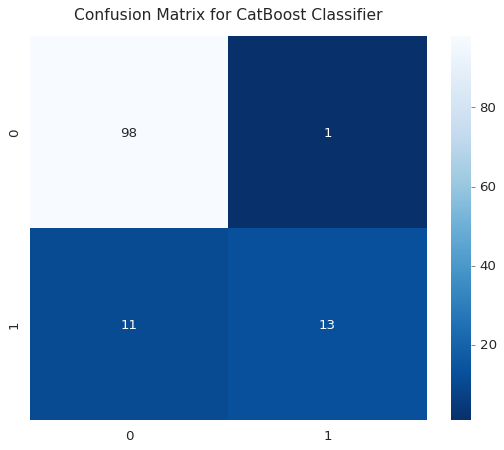

In [ ]:
# Confusion matrix
y_pred_cat = cat.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Classification Report of CatBoost Classifier

print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.93      0.54      0.68        24

    accuracy                           0.90       123
   macro avg       0.91      0.77      0.81       123
weighted avg       0.90      0.90      0.89       123



## Confusion Matrix for Hepatitis Outcome Prediction

This matrix evaluates the model's performance in differentiating between two categories:
- **0 (Non-fatal)**: Patients unlikely to experience a fatal outcome from hepatitis.
- **1 (Fatal)**: Patients at risk of a fatal outcome from hepatitis.

### Performance Metrics

- **Non-fatal Cases (0)**
  - **Precision:** 90% - High accuracy in predicting non-fatal cases.
  - **Recall:** 99% - Exceptionally effective in identifying actual non-fatal cases.
  - **F1-Score:** 94% - Excellent balance of precision and recall.

- **Fatal Cases (1)**
  - **Precision:** 93% - Very high accuracy in predicting fatal cases.
  - **Recall:** 54% - Moderate effectiveness in identifying actual fatal cases.
  - **F1-Score:** 68% - Reflects the disparity between high precision and moderate recall.

- **Overall Accuracy:** 90% - The model accurately predicts 90% of the cases.

### Summary

- The model shows strong performance in identifying non-fatal cases with nearly perfect recall.
- Although precision for fatal cases is high, the lower recall indicates a need for improvement in correctly identifying all actual fatal cases.


## Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 93.4959349593496


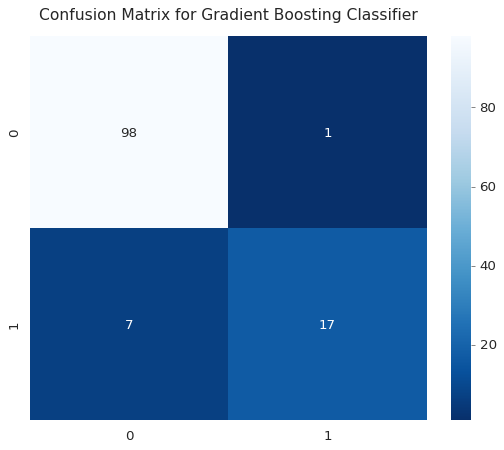

In [ ]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Classification Report of Gradient Boosting Classifier

print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.94      0.71      0.81        24

    accuracy                           0.93       123
   macro avg       0.94      0.85      0.89       123
weighted avg       0.94      0.93      0.93       123



## Confusion Matrix for Hepatitis Outcome Prediction

This matrix assesses the model's ability to predict two categories of hepatitis outcomes:
- **0 (Non-fatal)**: Patients unlikely to face a fatal outcome from hepatitis.
- **1 (Fatal)**: Patients at risk of a fatal outcome from hepatitis.

### Key Metrics

- **Non-fatal Cases (0)**
  - **Precision:** 93% - High accuracy in predicting non-fatal cases.
  - **Recall:** 99% - Excellent ability in correctly identifying actual non-fatal cases.
  - **F1-Score:** 96% - Reflects strong precision and recall balance.

- **Fatal Cases (1)**
  - **Precision:** 94% - Very high accuracy in predicting fatal cases.
  - **Recall:** 71% - Good, but not perfect, in identifying actual fatal cases.
  - **F1-Score:** 81% - Balances the high precision with good recall.

- **Overall Accuracy:** 93% - Demonstrates high effectiveness across all cases.

### Insights

- The model excels in identifying non-fatal cases with near-perfect recall.
- While precision for fatal cases is high, the recall is lower, suggesting room for improvement in accurately identifying all true fatal cases.


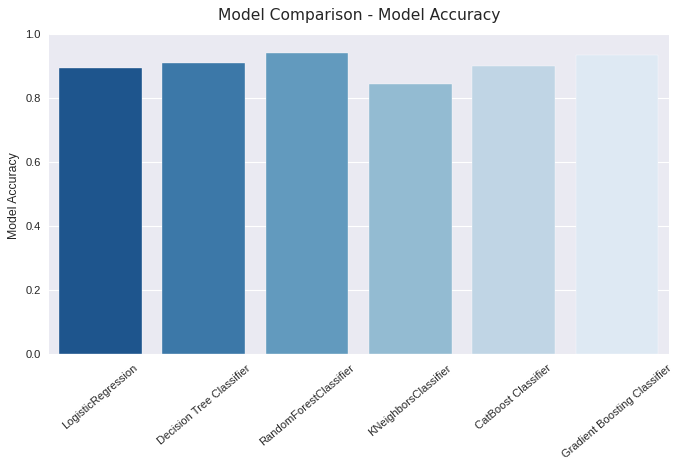

In [ ]:
plt.style.use("seaborn")

x = ["LogisticRegression",
     "Decision Tree Classifier",
     "RandomForestClassifier",
     "KNeighborsClassifier",
     "CatBoost Classifier",
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

## Model Performance Summary

### Random Forest Regression
- **Best Performance on Test Set**
- **Key Strengths:**
  - Robust against overfitting.
  - Handles both linear and non-linear data well.
  - Provides a good balance between bias and variance.

### Conclusion
Both the Gradient Boosting Classifier and Random Forest Regression demonstrate strong performance on the test set, indicating their effectiveness in predictive modeling for this specific dataset.


## Save the RandomForestClassifier model to a file


In [ ]:
joblib.dump(rfc, '/content/random_forest_model.pkl')

print("Random Forest Model saved successfully!")

Random Forest Model saved successfully!


In [ ]:
# Assuming df is your dataframe and 'Category' is the target variable
X = df.drop('Category', axis=1)
y = df['Category']

# Assuming you're using the same train-test split as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on your training data
scaler = StandardScaler()
scaler.fit(X_train)

# Optionally: Transform your training data (if you haven't done this already)
X_train_scaled = scaler.transform(X_train)

In [ ]:
# Save the scaler to a file
joblib.dump(scaler, '/content/scaler.pkl')

['/content/scaler.pkl']

## Prediction as per the Random Forest Model based on the user input

In [ ]:
2# Load your trained RandomForest model and StandardScaler
rfc = joblib.load('/content/random_forest_model.pkl')
scaler = joblib.load('/content/scaler.pkl')

def get_input(feature_name, full_name, input_type=float):
    """
    Safely get user input for a given feature.
    """
    while True:
        try:
            return input_type(input(f"Enter {full_name} ({feature_name}): "))
        except ValueError:
            print(f"Invalid input. Please enter a valid {feature_name}.")

def predict_hepatitis_with_probability():
    # Collect user inputs
    age = get_input("Age", "Age")
    sex_input = get_input("Sex", "Sex (Enter 'M' for Male or 'F' for Female)", str)
    sex = 1 if sex_input.lower() in ['m', 'male'] else 2
    alb = get_input("ALB", "Albumin")
    alp = get_input("ALP", "Alkaline Phosphatase")
    alt = get_input("ALT", "Alanine Aminotransferase")
    ast = get_input("AST", "Aspartate Aminotransferase")
    bil = get_input("BIL", "Bilirubin")
    che = get_input("CHE", "Cholinesterase")
    chol = get_input("CHOL", "Cholesterol")
    crea = get_input("CREA", "Creatinine")
    ggt = get_input("GGT", "Gamma-Glutamyl Transferase")
    prot = get_input("PROT", "Protein")

    # Prepare the input data
    input_data = np.array([age, sex, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot])
    scaled_input = scaler.transform([input_data])

    # Make a prediction and get probabilities
    probabilities = rfc.predict_proba(scaled_input)[0]

    # Display probabilities and prediction
    print(f"\nProbability that a patient is healthy and will live: {probabilities[0] * 100:.2f}%")
    print(f"Probability that a person is suspected hepatitis patient and may not survive: {probabilities[1] * 100:.2f}%")

    if probabilities[1] >= 0.5:
        print(f"\nPrediction: This individual is at RISK for hepatitis, which is a serious condition requiring prompt medical attention.")
    else:
        print(f"\nPrediction: This person is a HEALTHY patient.")

# Call the prediction function with probability
predict_hepatitis_with_probability()


Enter Age (Age): 25
Enter Sex (Enter 'M' for Male or 'F' for Female) (Sex): F
Enter Albumin (ALB): 4
Enter Alkaline Phosphatase (ALP): 100
Enter Alanine Aminotransferase (ALT): 38
Enter Aspartate Aminotransferase (AST): 1
Enter Bilirubin (BIL): 1
Enter Cholinesterase (CHE): 16
Enter Cholesterol (CHOL): 100
Enter Creatinine (CREA): 0.98
Enter Gamma-Glutamyl Transferase (GGT): 36
Enter Protein (PROT): 6.8

Probability that a patient is healthy and will live: 52.00%
Probability that a person is suspected hepatitis patient and may not survive: 48.00%

Prediction: This person is a HEALTHY patient.


| Term | Full Name | Description | Tolerable Range | Units |
|------|-----------|-------------|-----------------|-------|
| ALB  | Albumin | Liver protein | 3.4 - 5.4 | g/dL |
| ALP  | Alkaline Phosphatase | Bile duct enzyme | 44 - 147 | IU/L |
| ALT  | Alanine Aminotransferase | Liver enzyme | 7 - 56 | IU/L |
| AST  | Aspartate Aminotransferase | Liver/heart enzyme | 10 - 40 | IU/L |
| BIL  | Bilirubin | Liver function indicator | 0.1 - 1.2 | mg/dL |
| CHE  | Cholinesterase | Nervous system enzyme | 8,500 - 20,000 | U/L |
| CHOL | Cholesterol | Fat for cell building | Less than 200 | mg/dL |
| CREA | Creatinine | Kidney function indicator | 0.84 - 1.21 | mg/dL |
| GGT  | Gamma-Glutamyl Transferase | Liver/bile duct enzyme | 9 - 48 | IU/L |
| PROT | Protein | Blood protein level | 6.0 - 8.3 | g/dL |

